In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.4.0
TFP version: 0.12.1


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

In [4]:
batched_mv_normal = tfd.MultivariateNormalDiag(
    loc=[[0.3, 0.8, 1.1], [2.3, -0.3, -1.]],
    scale_diag=[[1.5, 1., 0.4], [2.5, 1.5, 0.5]]
)
batched_mv_normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2] event_shape=[3] dtype=float32>

In [5]:
batched_mv_normal.log_prob([0., -1., 1.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -3.9172401, -11.917513 ], dtype=float32)>

In [6]:
# Define 2D multivariate Gaussian with Diagonal Covariance Matrix
normal_diag = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [7]:
normal_diag.sample(1)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.8980837, -2.6518288]], dtype=float32)>

In [8]:
normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.33875433,  1.6899722 ],
       [-0.6605785 ,  0.4290012 ],
       [ 0.43852386,  2.6577132 ],
       [-0.53591555, -0.07069659],
       [-1.0324248 , -4.88541   ],
       [ 0.22994906, -0.09240854],
       [-0.29739588,  1.0331368 ],
       [ 0.15928634,  0.12070847],
       [ 1.2443346 , -0.6772878 ],
       [-0.42134959,  1.1460426 ]], dtype=float32)>

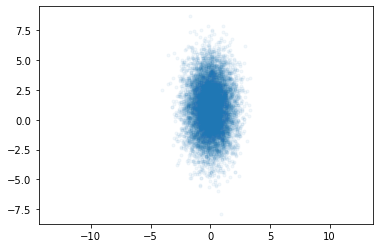

In [9]:
plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

In [11]:
normal_diag = tfd.MultivariateNormalDiag(loc=[0, 0.5, 1], scale_diag=[1, 2, 3])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[3] dtype=float32>

/Users/shankar/dev/tools/anaconda3/envs/od/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


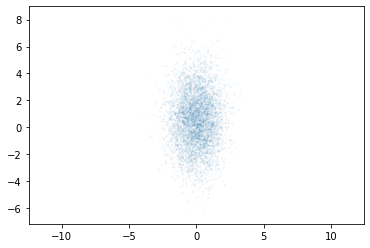

In [13]:
plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], plt_sample[:, 2], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

In [14]:
normal_diag_batch = tfd.MultivariateNormalDiag(
    loc=[[0, 0], [0, 0], [0, 0]], 
    scale_diag=[[1, 2], [2, 1], [2, 2]]
)
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [16]:
samples = normal_diag_batch.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.09693469,  0.39558294],
        [ 0.14190346,  1.2710105 ],
        [-4.1962748 , -3.1416984 ]],

       [[ 0.4167602 , -0.07655823],
        [-1.8271412 , -1.4591024 ],
        [-0.9379671 ,  1.0440688 ]],

       [[ 0.34725377,  0.06432252],
        [ 3.123134  ,  1.2490778 ],
        [ 0.9671666 ,  1.7186483 ]],

       [[-0.41472605, -0.0842573 ],
        [-1.837216  ,  0.48245886],
        [ 1.3278377 ,  3.7658026 ]],

       [[-0.2515119 ,  3.5494683 ],
        [-0.40785396,  1.0235562 ],
        [-2.558961  , -1.3139757 ]]], dtype=float32)>

In [18]:
normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-2.555283 , -3.3412752, -6.659045 ],
       [-2.6186013, -4.01282  , -3.4704041],
       [-2.591834 , -4.5303674, -3.7103167],
       [-2.6179104, -3.0693278, -5.217224 ],
       [-4.137494 , -3.075651 , -4.258523 ]], dtype=float32)>

In [20]:
plt_sample_batch = normal_diag_batch.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

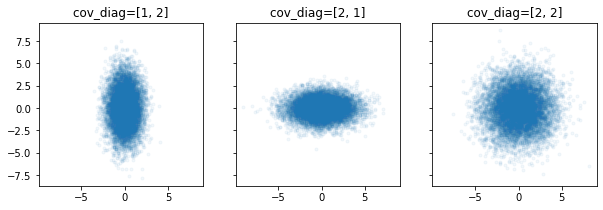

In [21]:
fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs, titles)):
    samples = plt_sample_batch[:, i, :]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()